**Problem Statement 1**: The data (sample) were collected in São Paulo — Brazil, in a university, where there are some parties with groups of students from 18 to 28 years of age (average). The dataset used for this activity has 7 attributes, being a Target, with a period of one year. You have to predict the quantity of beer consumption based on the features that contain climate conditions.

**Dataset Description:**
* I. Data: date of the record
* II. Temperatura Media (C): Average temperature of the day in celsius
* III. Temperatura Minima (C): Minimum temperature of the day in celsius
* IV. Temperatura Maxima (C): Maximum temperature of the day in celsius
* V. Precipitacao (mm): Percipitation in mm
* VI. Final de Semana: If the day is the weekend or not
* VII. Consumo de cerveja (litros): Beer consumption in liters


Write a Python code to perform the following tasks mentioned:

1. Load the dataset, check its shape
2. Rectify the data of the first four columns Hint: Check columns 'Temperatura Media (C)', 'Temperatura Minima (C)', 'Temperatura Maxima (C)', and 'Precipitac’ Fix the following errors present in these features
3. Create new features using the 'Data' feature and the make 'Data' column as index Hint: Create a new feature 'Month' from the dates, consisting of the month of the year. Create a new feature 'Day' from the dates, consisting of the day of the week. Set values from the 'Data' column as indexes. Use code snippet: df1.set_index('Data',inplace=True)
4. Handle null and duplicate values
5. Check the data type of the features and convert them to the appropriate data type
6. Analyze features with outlier values
7. Plot and analyze the correlation
8. Split the dataset for training and testing
9. Train a linear regression model and print the intercept and coefficients
10. Evaluate the model using the R2 score, mean absolute error, and root mean squared error

### Make necessary imports

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
# Load the data
dataset_1 = pd.read_csv('https://raw.githubusercontent.com/krutika-shimpi/Edureka_Internship_Assigments_solved/main/4_Supervised_Machine_Learning/Datasets/Consumo_cerveja.csv', parse_dates=['Data'])
dataset_1.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [3]:
# Check columns type and rectify the data
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Data                         365 non-null    datetime64[ns]
 1   Temperatura Media (C)        365 non-null    object        
 2   Temperatura Minima (C)       365 non-null    object        
 3   Temperatura Maxima (C)       365 non-null    object        
 4   Precipitacao (mm)            365 non-null    object        
 5   Final de Semana              365 non-null    float64       
 6   Consumo de cerveja (litros)  365 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 51.6+ KB


In [4]:
# Fix the errors present in these features  'Temperatura Media (C)', 'Temperatura Minima (C)', 'Temperatura Maxima (C)', and 'Precipitac’
dataset_1['Temperatura Media (C)'] = dataset_1['Temperatura Media (C)'].str.replace(',', '.').astype('float')
dataset_1['Temperatura Minima (C)'] = dataset_1['Temperatura Minima (C)'].str.replace(',', '.').astype('float')
dataset_1['Temperatura Maxima (C)'] = dataset_1['Temperatura Maxima (C)'].str.replace(',', '.').astype('float')
dataset_1['Precipitacao (mm)'] = dataset_1['Precipitacao (mm)'].str.replace(',', '.').astype('float')

dataset_1.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


In [5]:
# Check the dataset again to see if the datatypes are right
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Data                         365 non-null    datetime64[ns]
 1   Temperatura Media (C)        365 non-null    float64       
 2   Temperatura Minima (C)       365 non-null    float64       
 3   Temperatura Maxima (C)       365 non-null    float64       
 4   Precipitacao (mm)            365 non-null    float64       
 5   Final de Semana              365 non-null    float64       
 6   Consumo de cerveja (litros)  365 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 51.6 KB


In [6]:
# Handle the duplicate values by dropping the duplicates since the values are not null by random
dataset_1.drop_duplicates(inplace = True)
dataset_1.duplicated().sum()

0

In [7]:
# Create a new feature 'Month' from the dates, consisting of the month of the year.
dataset_1['Month'] = dataset_1['Data'].dt.month
# Create a new feature 'Day' from the dates, consisting of the day of the week.
dataset_1['Day'] = dataset_1['Data'].dt.day

# Make 'Data' column as index
dataset_1.set_index('Data', inplace = True)

dataset_1.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Month,Day
Data,,,,,,,,
2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461,1.0,1.0
2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972,1.0,2.0
2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814,1.0,3.0
2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,1.0,4.0
2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900,1.0,5.0


In [8]:
# Check how many null values are present in the data
dataset_1 = dataset_1.drop(dataset_1.index[-1])
dataset_1.isnull().sum()

Temperatura Media (C)          0
Temperatura Minima (C)         0
Temperatura Maxima (C)         0
Precipitacao (mm)              0
Final de Semana                0
Consumo de cerveja (litros)    0
Month                          0
Day                            0
dtype: int64

#### Analyze features with outlier values

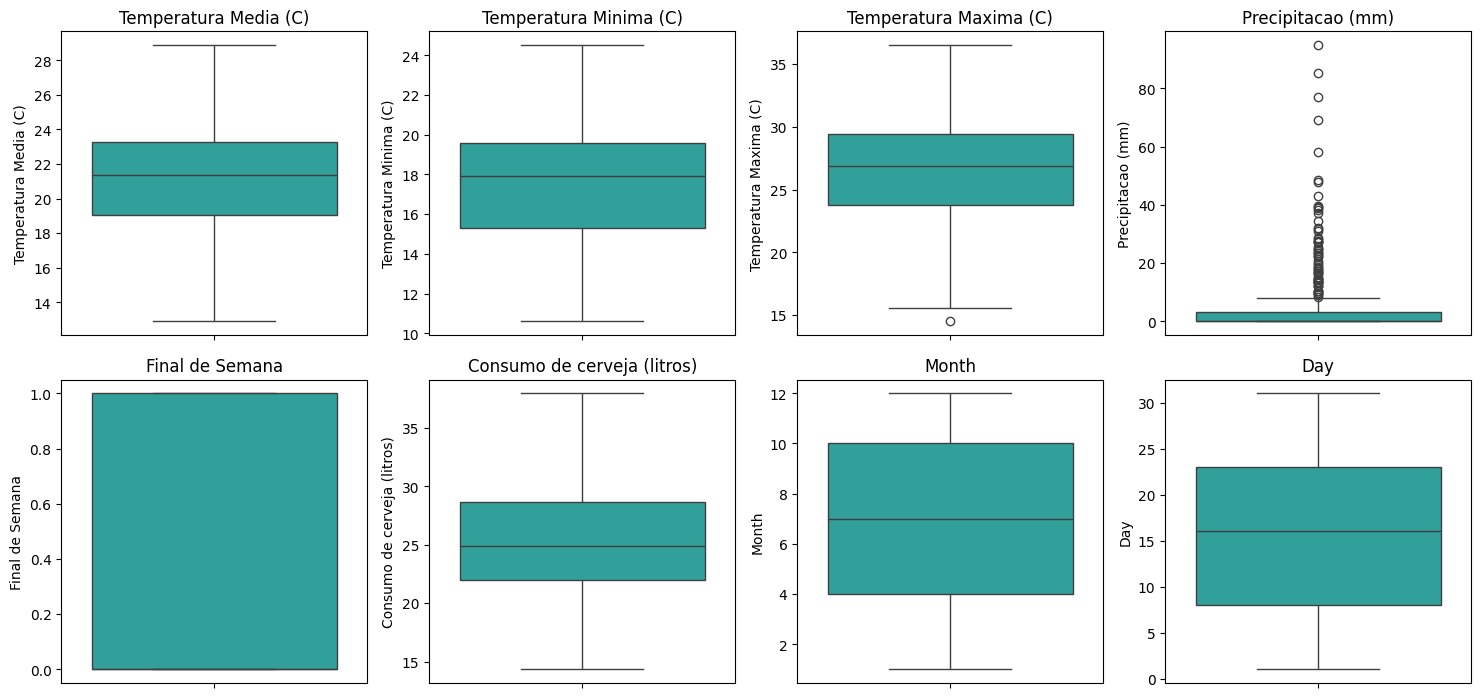

In [9]:
plt.figure(figsize = (15, 14))
# Visualize outliers using box plots
for index, column in enumerate(dataset_1.columns):
  plt.subplot(4, 4, index + 1)
  sns.boxplot(data=dataset_1[column], color = 'lightseagreen')
  plt.title(column)
plt.tight_layout()

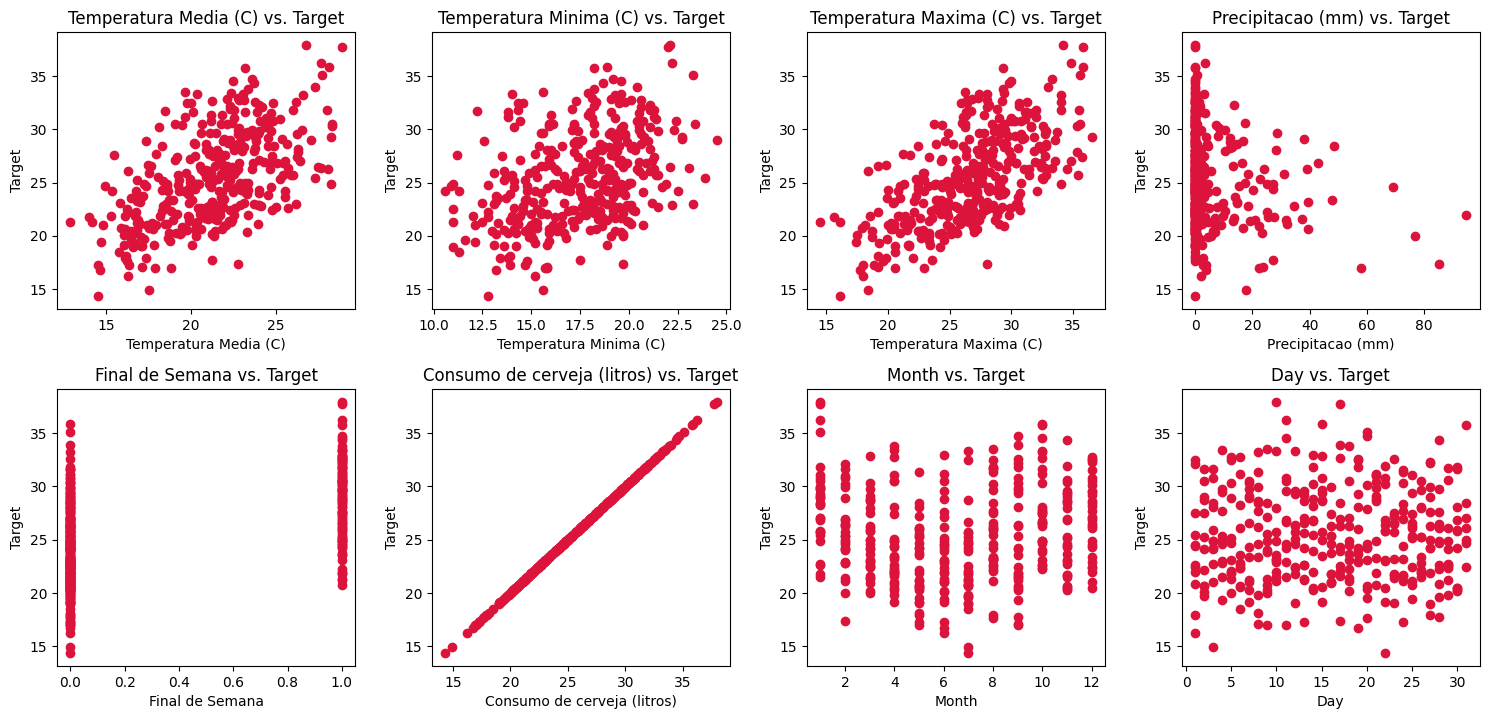

In [10]:
plt.figure(figsize = (15, 14))
# Visualize outliers using box plots
for index, column in enumerate(dataset_1.columns):
  plt.subplot(4, 4, index + 1)
  plt.scatter(dataset_1[column], dataset_1['Consumo de cerveja (litros)'], c = 'crimson')
  plt.xlabel(column)
  plt.ylabel('Target')
  plt.title(f'{column} vs. Target')

# Add space between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)  # Adjust as needed
plt.tight_layout()
plt.show()

In [11]:
# Identify outliers using z-scores
z_scores = np.abs((dataset_1 - dataset_1.mean()) / dataset_1.std())
outliers = z_scores > 3  # Adjust the threshold as needed
print(outliers.sum())

Temperatura Media (C)          0
Temperatura Minima (C)         0
Temperatura Maxima (C)         0
Precipitacao (mm)              8
Final de Semana                0
Consumo de cerveja (litros)    0
Month                          0
Day                            0
dtype: int64


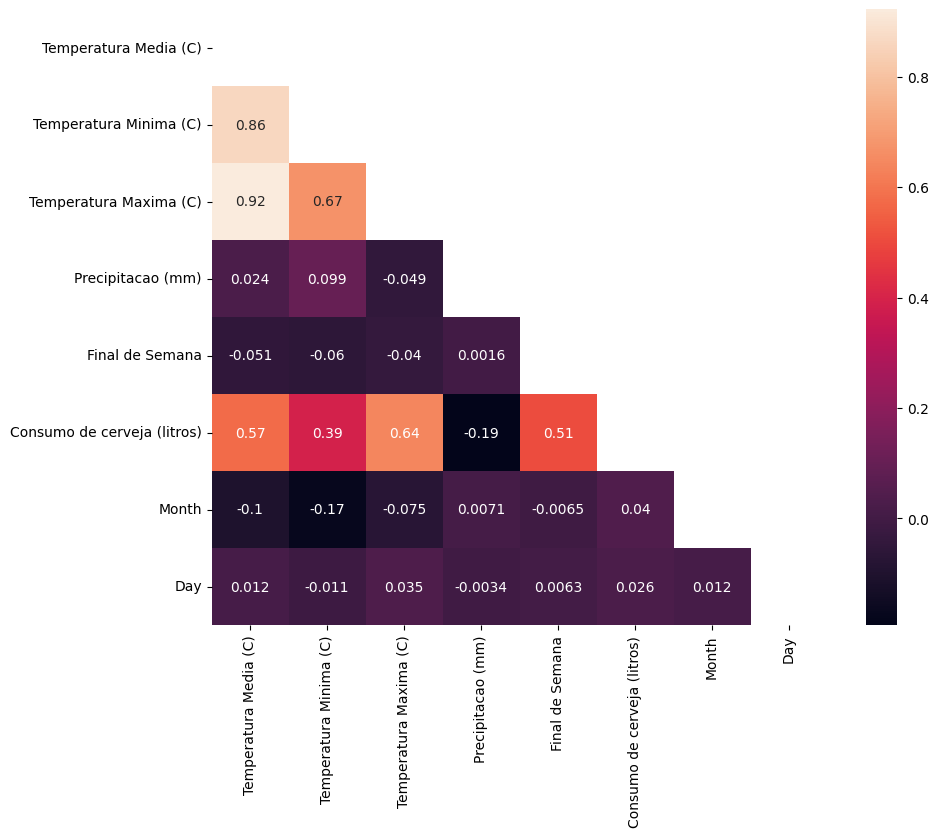

In [12]:
# Plot and analyze the correlation
# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(dataset_1.corr(), dtype=bool))

# Plot the heatmap with masked upper triangle
plt.figure(figsize=(10, 8))
sns.heatmap(dataset_1.corr(), annot=True, square=True, mask=mask)

plt.show()

In [13]:
# Split the data into X and y
X_data1 = dataset_1.drop('Consumo de cerveja (litros)', axis = 1)
y_data1 = dataset_1['Consumo de cerveja (litros)']

# Create train and test sets
X_train, X_test, y_train, y_test = split(X_data1,
                                         y_data1,
                                         test_size = 0.2,
                                         random_state = 42)

len(X_train), len(X_test), len(y_train), len(y_test)

(292, 73, 292, 73)

In [14]:
# Train a linear regression model
linear_regression = LinearRegression()

# Fit the training set
linear_regression.fit(X_train, y_train)

# Make predictions on the test data
y_preds_1 = linear_regression.predict(X_test)

# Print the intercept and coefficients
print(f"The intercept of the model is: {linear_regression.intercept_}")
print(f"\nThe coefficients of the model is: {linear_regression.coef_}")

The intercept of the model is: 5.003989009263819

The coefficients of the model is: [ 3.94976481e-02 -1.91877945e-04  6.50263753e-01 -4.38101565e-02
  5.23262603e+00  1.41392806e-01  4.16493780e-03]


In [15]:
# Create a function for to print the evaluation metrics of the model
def model_evaluation(y_true, y_preds):
  """
  Returns the evaluation metrics as dictionary
  """
  evaluation_metrics = {'r2_score': r2_score(y_true, y_preds),
                       'mean_absolute_error': mean_absolute_error(y_true, y_preds),
                       'mean_squared_error': mean_squared_error(y_true, y_preds),
                       'root_mean_absolute_error': np.sqrt(mean_squared_error(y_true, y_preds))}

  return evaluation_metrics

In [16]:
# Evaluate the model using the R2 score, mean absolute error, and root mean squared error
model_1_results = model_evaluation(y_true = y_test,
                                   y_preds = y_preds_1)

model_1_results

{'r2_score': 0.7406013522605526,
 'mean_absolute_error': 1.987045901260361,
 'mean_squared_error': 5.748034815976707,
 'root_mean_absolute_error': 2.3975059574434234}

**Problem Statement 2:** You are provided with the California housing dataset. Based on the given parameters of a house, predict its price.

**Dataset Description:** The dataset contains nine features:
1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. total rooms: Total number of rooms within a block
5. total bedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. median income: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. median house value: Median house value for households within a block (measured in US Dollars)

Write a Python code to perform the following tasks mentioned:
1. Load the data, check its shape and check for null values
2. Split the dataset for training and testing - 1000 instances for testing
3. Train the model using sklearn (Apply linear regression to train a model for prediction)
4. Predict the prices on test data and evaluate the model by r2 score and mean absolute error
5. Find coefficient and intercept using the trained model

In [17]:
# Load the data
housing_data = pd.read_csv('https://raw.githubusercontent.com/krutika-shimpi/Edureka_Internship_Assigments_solved/main/4_Supervised_Machine_Learning/Datasets/california_housing_train.csv')
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [18]:
# Check its shape and check for null values
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [19]:
housing_data.shape

(17000, 9)

In [20]:
# Check for null values
housing_data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [21]:
# Split the data into training and test set: 1000 instances for testing
train_X, test_X, train_y, test_y = split(housing_data.iloc[:,:-1],
                                         housing_data.iloc[:,-1],
                                         test_size = 1000,
                                         random_state = 42)

len(train_X), len(test_X), len(train_y), len(test_X)

(16000, 1000, 16000, 1000)

In [22]:
# Train a linear regression model
lin_reg = LinearRegression()

# Fit the model
lin_reg.fit(train_X, train_y)

# Make some predictions on the test data
y_preds_linreg = lin_reg.predict(test_X)

# Print the intercept and coefficients
print(f"The intercept of the model is: {lin_reg.intercept_}")
print(f"\nThe coefficients of the model is:\n{lin_reg.coef_}")

# Evaluate the model results
model_2_linreg_results = model_evaluation(y_true = test_y,
                                          y_preds = y_preds_linreg)

print('\n\nLinear Regression results:')
model_2_linreg_results

The intercept of the model is: -3632877.8425115175

The coefficients of the model is:
[-4.32650586e+04 -4.29877050e+04  1.13224456e+03 -8.24971921e+00
  1.15173391e+02 -3.72835206e+01  4.39458716e+01  4.04437504e+04]


Linear Regression results:


{'r2_score': 0.6427633944326662,
 'mean_absolute_error': 52486.71121771064,
 'mean_squared_error': 5309677915.689073,
 'root_mean_absolute_error': 72867.5367752271}

**Problem Statement 3:** You are provided with the medical cost dataset. You need to predict individual medical costs billed by health insurance.

**Dataset Description:**
1. age: age of the primary beneficiary
2. sex: gender of primary beneficiary female, male
3. bmi: Body mass index, providing an understanding of the body, weights that are relatively high or low relative to height, an objective index of body
4. weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
5. children: Number of children covered by health insurance / Number of dependents
6. smoker: Smokes or not
7. region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest
8. charges: Individual medical costs billed by health insurance

Write a Python code to perform the following tasks mentioned:
1. Load the data, check its shape and check for null values
2. Convert categorical features to numerical values (Use One-Hot Encoding)
3. Split the dataset for training and testing
4. Train the model using sklearn – Linear Regression
5. Find the intercept and coefficient from the trained model
6. Predict the prices of test data and evaluate the model using calculated r2 score and root mean squared error

In [23]:
# Load the data
insurance_data = pd.read_csv('https://raw.githubusercontent.com/krutika-shimpi/Edureka_Internship_Assigments_solved/main/4_Supervised_Machine_Learning/Datasets/insurance.csv')
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


1. Load the data, check its shape and check for null values
2. Convert categorical features to numerical values (Use One-Hot Encoding)
3. Split the dataset for training and testing
4. Train the model using sklearn – Linear Regression
5. Find the intercept and coefficient from the trained model
6. Predict the prices of test data and evaluate the model using calculated r2 score and root mean squared error

In [24]:
# Check its shape and check for null values
insurance_data.shape

(1338, 7)

In [25]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [26]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [27]:
insurance_data.duplicated().sum()

1

In [28]:
X = insurance_data.drop('charges', axis = 1)
y = insurance_data.charges

# Convert categorical features to numerical values (Use One-Hot Encoding)
ct = ColumnTransformer(transformers = [
    ('one hot encoding',
    OneHotEncoder(),
    ['sex', 'smoker', 'region'])],
                       remainder = 'passthrough')

# Fit the transformer on the data
transformed_data = ct.fit_transform(X)

In [29]:
# Split the data into training and testing set
train_data, test_data, train_charges, test_charges = split(transformed_data, y, test_size = 0.25, random_state = 42)
len(train_data), len(train_charges), len(test_data), len(test_charges)

(1003, 1003, 335, 335)

In [30]:
# Train a linear regression model
regressor = LinearRegression()

# Fit the model
regressor.fit(train_data, train_charges)

# Make some predictions on the test data
y_preds_regressor = regressor.predict(test_data)

# Print the intercept and coefficients
print(f"The intercept of the model is: {regressor.intercept_}")
print(f"\nThe coefficients of the model is:\n{regressor.coef_}")

# Evaluate the model results
model_3_regressor_results = model_evaluation(y_true = test_charges,
                                             y_preds = y_preds_regressor)

print('\n\nLinear Regression results:')
model_3_regressor_results

The intercept of the model is: -799.637255561347

The coefficients of the model is:
[   -22.81121375     22.81121375 -11815.19949515  11815.19949515
    499.19593062    144.04730929   -282.1724583    -361.07078161
    259.62363309    339.80503104    426.50272274]


Linear Regression results:


{'r2_score': 0.7672642952734355,
 'mean_absolute_error': 4243.654116653155,
 'mean_squared_error': 35117755.73613634,
 'root_mean_absolute_error': 5926.023602394471}

**Problem Statement 4:** You are provided with the '50_Startups' data. Using the given features, you must predict the profit of these startups.

**Dataset Description:**
* R&D Spend: Expenditures in Research and Development
* Administration: Expenditures in Administration
* Marketing Spend: Expenditures in Marketing
* State: In which state the company belongs to
* Profit: The profit made by the company

Write a Python code to perform the following tasks mentioned:
1. Load the data, check its shape and check for null values
2. Convert categorical features to numerical values using Label Encoder
3. Split the dataset for training and testing
4. Train the model using sklearn (linear regression), also find the intercept and coefficient from the trained model
5. Predict the profits of test data and evaluate the model using r2 score and mean squared error
6. Regularize the model using Ridge Regression and find the Score
7. Regularize the model using Lasso Regression and find the Score

In [31]:
# Load the data
startups_data = pd.read_csv('https://raw.githubusercontent.com/krutika-shimpi/Edureka_Internship_Assigments_solved/main/4_Supervised_Machine_Learning/Datasets/50_Startups.csv')
startups_data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [32]:
# check its shape and check for null values
startups_data.shape

(50, 5)

In [33]:
startups_data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [35]:
startups_data.duplicated().sum()

0

In [42]:
# Convert categorical features to numerical values using Label Encoder
label_encode = LabelEncoder()

startups_data['State'] = label_encode.fit_transform(startups_data['State'])
startups_data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [75]:
# Split the dataset for training and testing
train_data_X, test_data_X, train_data_y, test_data_y = split(startups_data.iloc[:,:-1],
                                                             startups_data.iloc[:,-1],
                                                             test_size = 0.35,
                                                             random_state = 42)
len(train_data_X), len(train_data_y), len(test_data_X), len(test_data_y)

(32, 32, 18, 18)

In [76]:
# Train a linear regression model
lr = LinearRegression()

# Fit the model
lr.fit(train_data_X, train_data_y)

# Make some predictions on the test data
y_preds_lr = lr.predict(test_data_X)

# Print the intercept and coefficients
print(f"The intercept of the model is: {lr.intercept_}")
print(f"\nThe coefficients of the model is:\n{lr.coef_}")

# Evaluate the model results
model_4_lr_results = model_evaluation(y_true = test_data_y,
                                      y_preds = y_preds_lr)

print('\n\nLinear Regression results:')
model_4_lr_results

The intercept of the model is: 55480.54402755317

The coefficients of the model is:
[ 7.64995993e-01 -7.64813364e-02  4.33322677e-02 -4.81576562e+02]


Linear Regression results:


{'r2_score': 0.9490448756146563,
 'mean_absolute_error': 7168.819818084427,
 'mean_squared_error': 79670427.13911945,
 'root_mean_absolute_error': 8925.829212970604}

In [77]:
# Regularize the model using Ridge Regression and find the Score
rr = Ridge(alpha = 10)

# Fit the model
rr.fit(train_data_X, train_data_y)

# Make some predictions on the test data
y_preds_rr = rr.predict(test_data_X)

# Print the intercept and coefficients
print(f"The intercept of the model is: {rr.intercept_}")
print(f"\nThe coefficients of the model is:\n{rr.coef_}")

# Evaluate the model results
model_5_rr_results = model_evaluation(y_true = test_data_y,
                                      y_preds = y_preds_rr)

print('\n\Ridge Regression results:')
model_5_rr_results

The intercept of the model is: 55287.57698994253

The coefficients of the model is:
[ 7.64223602e-01 -7.59656987e-02  4.34759653e-02 -3.27458669e+02]

\Ridge Regression results:


{'r2_score': 0.9491800817266738,
 'mean_absolute_error': 7174.897881399083,
 'mean_squared_error': 79459026.83686931,
 'root_mean_absolute_error': 8913.979293046923}

In [78]:
# Regularize the model using Lasso Regression and find the Score
lasso = Lasso(alpha = 1)

# Fit the model
lasso.fit(train_data_X, train_data_y)

# Make some predictions on the test data
y_preds_lasso = lasso.predict(test_data_X)

# Print the intercept and coefficients
print(f"The intercept of the model is: {lasso.intercept_}")
print(f"\nThe coefficients of the model is:\n{lasso.coef_}")

# Evaluate the model results
model_6_lasso_results = model_evaluation(y_true = test_data_y,
                                         y_preds = y_preds_lasso)

print('\n\Lasso Regression results:')
model_6_lasso_results

The intercept of the model is: 55478.65823754736

The coefficients of the model is:
[ 7.64988447e-01 -7.64762967e-02  4.33336714e-02 -4.80070492e+02]

\Lasso Regression results:


{'r2_score': 0.9490463025397968,
 'mean_absolute_error': 7168.879165515376,
 'mean_squared_error': 79668196.08313026,
 'root_mean_absolute_error': 8925.70423457613}